In [3]:
import sys
sys.path.insert(0, '../')

import numpy as np
import pandas as pd
from src.factories import WheatData, WheatDataset
from src.factories import get_data, get_wheat_dataset, get_transforms
from src.visualize import imshow_with_bboxes

In [6]:
DIR_INPUT = "./../input/global-wheat-detection"

data: WheatData = get_data(DIR_INPUT)

transforms = get_transforms()
train_image_ids, train_df, val_image_ids, val_df = data.get_fold(0)
train_ds = get_wheat_dataset(
    DIR_INPUT, train_image_ids, train_df, "train", transforms.get_train_transforms()
)
val_ds = get_wheat_dataset(
    DIR_INPUT, val_image_ids, val_df, "train", transforms.get_valid_transforms()
)

/Users/yodaikishimoto/.local/share/virtualenvs/kaggle_global_wheat_detection-Hxp-F21z/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


## Show the same image with different augumentation 5 times

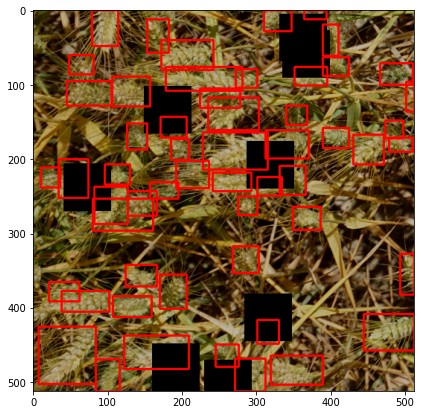

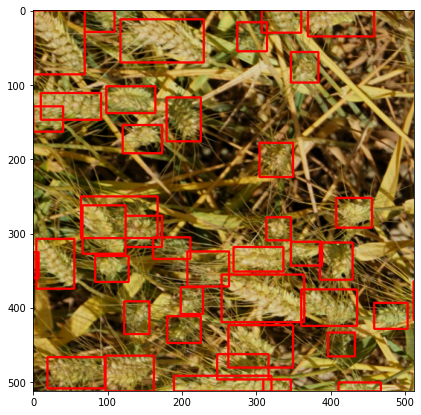

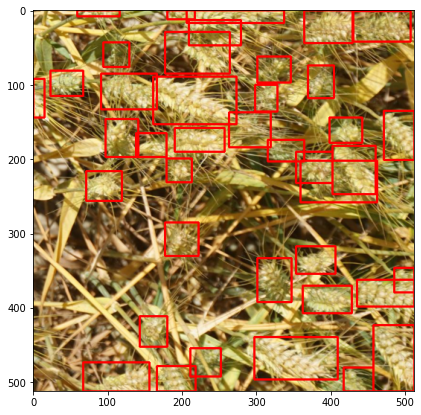

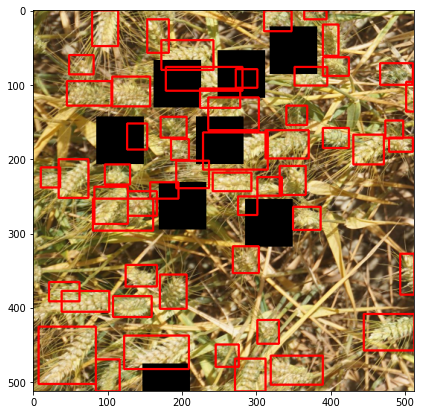

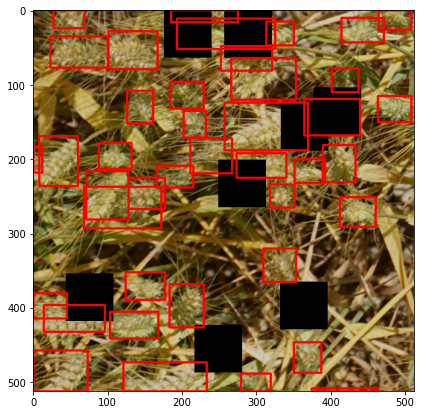

In [17]:
for i in range(5):
    img, target, image_id = train_ds[0]
    imshow_with_bboxes(img, target["bboxes"])